# Geely Auto - Linear Regression 

<B>Business Goal : </B>

Model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


<B>Key Queries to answered for the Business :</B>

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

### 1. Read Data  

In [3]:
# Supress Warnings and import numpy , pandas

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',-1)

In [4]:
## read data into dataframe 
cars=pd.read_csv(r'D:\UG\LinearRegression\Assignment\CarPrice_Assignment.csv')

In [5]:
##Inspect to make sure the data is loaded right.
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
###Inspect the data for presence of null values 
cars.isnull().sum()
cars.isnull().sum(axis=1).unique()

### No null values in rows and columns 

array([0], dtype=int64)

In [7]:
cars.shape
### 205 records with 26 variables 

(205, 26)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [9]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 2. Visualising Data & Clean up  

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
## Drop Card ID which has no relevance to the data 
cars.drop(['car_ID'], axis = 1, inplace = True)

#### Visualising Categorical Variables

In [12]:
## Split CarName to extract company Name
cars['Company']=cars['CarName'].str.split().str[0]
cars.drop(['CarName'], axis = 1, inplace = True)

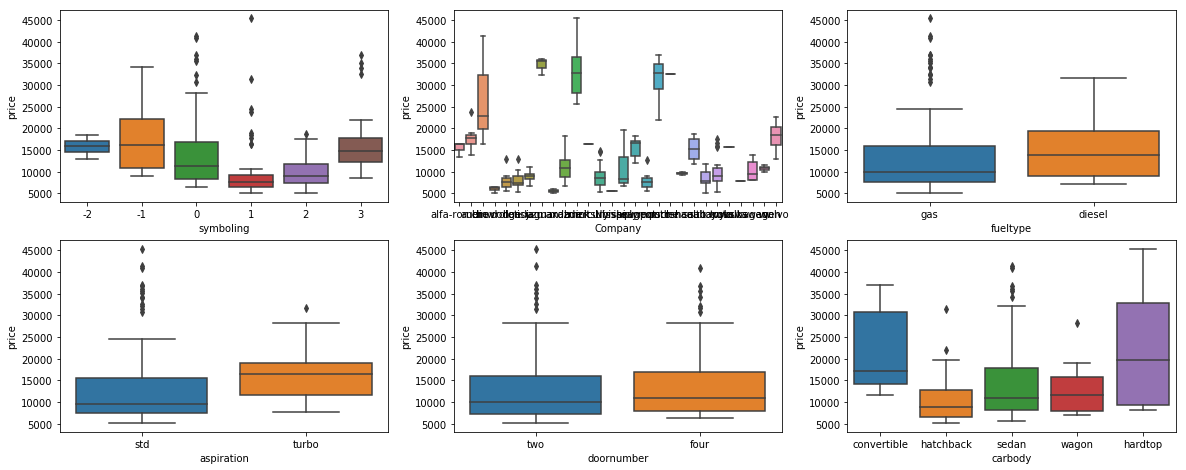

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'Company', y = 'price', data = cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(3,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.show()

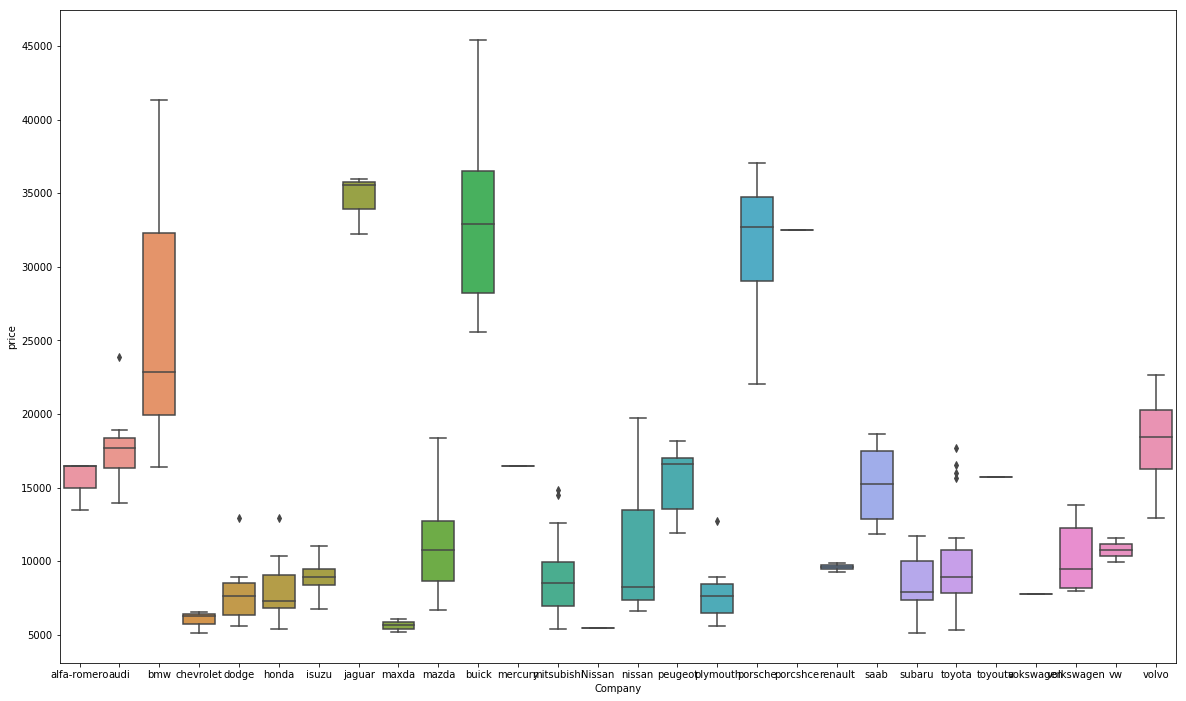

In [14]:
### Study Company Vs Price in detail.
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'Company', y = 'price', data = cars)

### Buick,BMW,Prosche, Jaguar are Companies with high prices

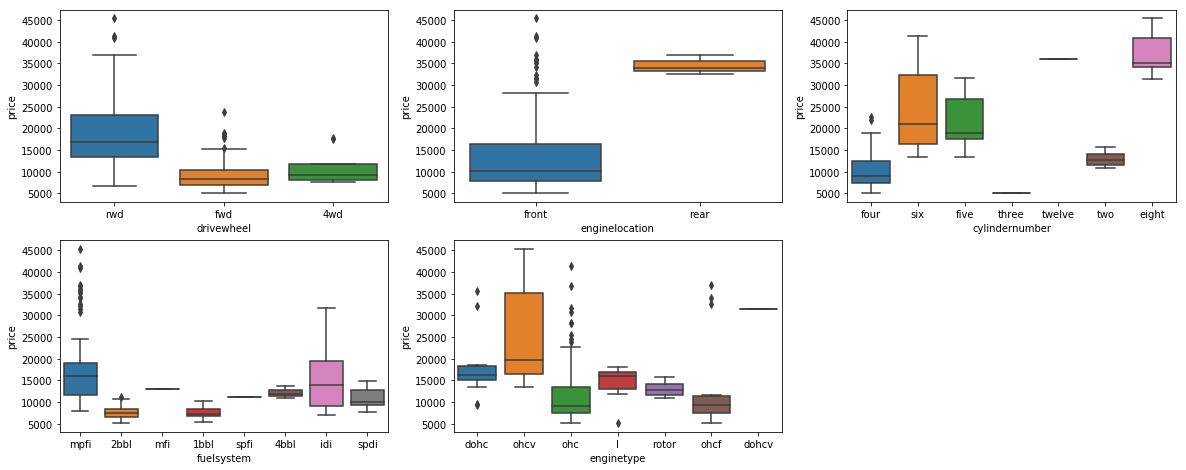

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.show()

In [16]:
##Inspect Fuel system for incorrectness/outliers
cars.groupby('fuelsystem').count()
##mpfi and spfi categories are only 1 . 

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
fuelsystem,,,,,,,,,,,,,,,,,,,,,
1bbl,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
2bbl,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
4bbl,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
idi,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
mfi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mpfi,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
spdi,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
spfi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [17]:
## Inspect for any incorrectness in cylindernumber
cars.groupby('cylindernumber').count()
## count of 3 cylinder and 12 cylinder is one each, they seem valid . Could be outliers.

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
cylindernumber,,,,,,,,,,,,,,,,,,,,,
eight,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
five,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
four,159,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,159,159,159,159,159
six,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
three,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
twelve,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
two,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [18]:
##Inspect CarNames 
cars.groupby('Company').count()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
Company,,,,,,,,,,,,,,,,,,,,,
Nissan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [19]:
## Correct typos seen in Company names

cars['Company'].replace('vokswagen','volkswagen', inplace=True)
cars['Company'].replace('vw','volkswagen', inplace=True)
cars['Company'].replace('porcshce','porsche', inplace=True)
cars['Company'].replace('toyouta','toyota', inplace=True)
cars['Company'].replace('maxda','mazda', inplace=True)

In [20]:
## Correct EngineType typos
cars.groupby('enginetype').count()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
enginetype,,,,,,,,,,,,,,,,,,,,,
dohc,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
dohcv,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
l,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
ohc,148,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
ohcf,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
ohcv,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
rotor,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


### Observations :

Price has correlation with 
1. fueltype
2. carbody
3. company name 
4. engine location
5. cyclindernumber 

### 3. Creation of Dummy variables for categories

In [21]:
## For Company 
status_company = pd.get_dummies(cars['Company'], drop_first=True)
cars=pd.concat([cars,status_company], axis=1)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [22]:
### For Symboling
status_symboling = pd.get_dummies(cars['symboling'], drop_first=True)
status_symboling.rename(columns=lambda x: "Symboling_"+ str(x), inplace=True)

cars=pd.concat([cars,status_symboling], axis=1)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,saab,subaru,toyota,volkswagen,volvo,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [23]:
## For Drivewheel
cars['drivewheel'].unique()
## Values 4wd, fwd,rwd seen. 4wd to be corrected as fwd .
cars['drivewheel']=cars['drivewheel'].replace("4wd","fwd")
cars['drivewheel']=cars['drivewheel'].map({"rwd":1,"fwd":0})
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,saab,subaru,toyota,volkswagen,volvo,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
0,3,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
1,3,gas,std,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
2,1,gas,std,two,hatchback,1,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,gas,std,four,sedan,0,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,gas,std,four,sedan,0,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [24]:
## For aspiration
cars['aspiration']=cars['aspiration'].map({'std': 1, "turbo": 0})
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,saab,subaru,toyota,volkswagen,volvo,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
0,3,gas,1,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
1,3,gas,1,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
2,1,gas,1,two,hatchback,1,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,gas,1,four,sedan,0,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,gas,1,four,sedan,0,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [25]:
## For FuelType
cars['fueltype']=cars['fueltype'].map({'gas': 1, "diesel": 0})
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,saab,subaru,toyota,volkswagen,volvo,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
0,3,1,1,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
1,3,1,1,two,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,two,hatchback,1,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,four,sedan,0,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,1,1,four,sedan,0,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [26]:
### For doornumber
cars['doornumber']=cars['doornumber'].map({"four":1, "two":0})
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,saab,subaru,toyota,volkswagen,volvo,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3
0,3,1,1,0,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
1,3,1,1,0,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,hatchback,1,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,sedan,0,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,1,1,1,sedan,0,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [27]:
### for Carbody
status_carbody = pd.get_dummies(cars['carbody'], drop_first=True)
status_carbody.rename(columns=(lambda x : "carbody_"+str(x)),inplace=True)
cars=pd.concat([cars,status_carbody], axis=1)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,volvo,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,1,1,0,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,3,1,1,0,convertible,1,front,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,1,1,1,0,hatchback,1,front,94.5,171.2,65.5,...,0,0,0,1,0,0,0,1,0,0
3,2,1,1,1,sedan,0,front,99.8,176.6,66.2,...,0,0,0,0,1,0,0,0,1,0
4,2,1,1,1,sedan,0,front,99.4,176.6,66.4,...,0,0,0,0,1,0,0,0,1,0


In [28]:
### for Enginelocation
cars['enginelocation']=cars['enginelocation'].map({"front":1,"rear":0})
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,volvo,Symboling_-1,Symboling_0,Symboling_1,Symboling_2,Symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,1,1,0,convertible,1,1,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,3,1,1,0,convertible,1,1,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,1,1,1,0,hatchback,1,1,94.5,171.2,65.5,...,0,0,0,1,0,0,0,1,0,0
3,2,1,1,1,sedan,0,1,99.8,176.6,66.2,...,0,0,0,0,1,0,0,0,1,0
4,2,1,1,1,sedan,0,1,99.4,176.6,66.4,...,0,0,0,0,1,0,0,0,1,0


In [29]:
### for Fuelsystem
status_fuelsystem = pd.get_dummies(cars['fuelsystem'], drop_first=True)
status_fuelsystem.rename(columns=(lambda x : "fuelsystem_"+str(x)),inplace=True)
cars=pd.concat([cars,status_fuelsystem], axis=1)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,carbody_hatchback,carbody_sedan,carbody_wagon,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,0,convertible,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,convertible,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,hatchback,1,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,1,1,1,sedan,0,1,99.8,176.6,66.2,...,0,1,0,0,0,0,0,1,0,0
4,2,1,1,1,sedan,0,1,99.4,176.6,66.4,...,0,1,0,0,0,0,0,1,0,0


In [30]:
### For cyclindernumber
status_cylindernumber = pd.get_dummies(cars['cylindernumber'], drop_first=True)
status_cylindernumber.rename(columns=(lambda x : "cylindernumber_"+str(x)),inplace=True)

cars=pd.concat([cars,status_cylindernumber], axis=1)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,1,1,0,convertible,1,1,88.6,168.8,64.1,...,0,1,0,0,0,1,0,0,0,0
1,3,1,1,0,convertible,1,1,88.6,168.8,64.1,...,0,1,0,0,0,1,0,0,0,0
2,1,1,1,0,hatchback,1,1,94.5,171.2,65.5,...,0,1,0,0,0,0,1,0,0,0
3,2,1,1,1,sedan,0,1,99.8,176.6,66.2,...,0,1,0,0,0,1,0,0,0,0
4,2,1,1,1,sedan,0,1,99.4,176.6,66.4,...,0,1,0,0,1,0,0,0,0,0


In [31]:
### For enginetype
status_enginetype = pd.get_dummies(cars['enginetype'], drop_first=True)
status_enginetype.rename(columns=(lambda x : "enginetype_"+str(x)),inplace=True)

cars=pd.concat([cars,status_enginetype], axis=1)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,1,1,0,convertible,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,0,convertible,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,hatchback,1,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,0,1,0
3,2,1,1,1,sedan,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,1,0,0,0
4,2,1,1,1,sedan,0,1,99.4,176.6,66.4,...,0,0,0,0,0,0,1,0,0,0


In [32]:
# Drop categorical columns in text 
cars.drop(['Company','symboling','carbody','fuelsystem','cylindernumber','enginetype'], axis = 1, inplace = True)

In [33]:
cars.info()
## 69 columns in total and all numerical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
drivewheel               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
alfa-romero              205 non-null uint8

In [34]:
cars.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,1,0,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,0,0,0,0,1,0
3,1,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,1,0,0,0
4,1,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,1,0,0,0


In [35]:
### check for duplicates if any in the final data set.
cars.duplicated().unique()
## no duplicates seen

array([False])

## 4. Splitting the Data into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

### Testing data will be 30% and training data will be 70% of the dataset.

#### Rescaling Features

In [37]:
###Feasture scaling using MinMax Scaler.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [38]:
df_train.describe()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.349650,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.132867,0.006993,0.006993,0.027972,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972
std,0.288490,0.387050,0.498199,0.478536,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.340624,0.083624,0.083624,0.165472,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Feature Selection using RFE

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y_train = df_train.pop('price')
X_train = df_train

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 1)   ### Get RFE to produce Rank for all variables upto the final one.           
rfe = rfe.fit(X_train, y_train)

In [40]:
## Get the list of Top 10 ranked independent variables.
rfe_result=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
#rfe_result.sort_values(by=2).head(10)
top10=rfe_result.sort_values(by=2).head(10)

top20=rfe_result.sort_values(by=2).head(20)

top20

,0,1,2
10,enginesize,True,1
9,curbweight,False,2
4,enginelocation,False,3
7,carwidth,False,4
20,bmw,False,5
59,cylindernumber_three,False,6
67,enginetype_rotor,False,7
33,porsche,False,8
11,boreratio,False,9
60,cylindernumber_twelve,False,10


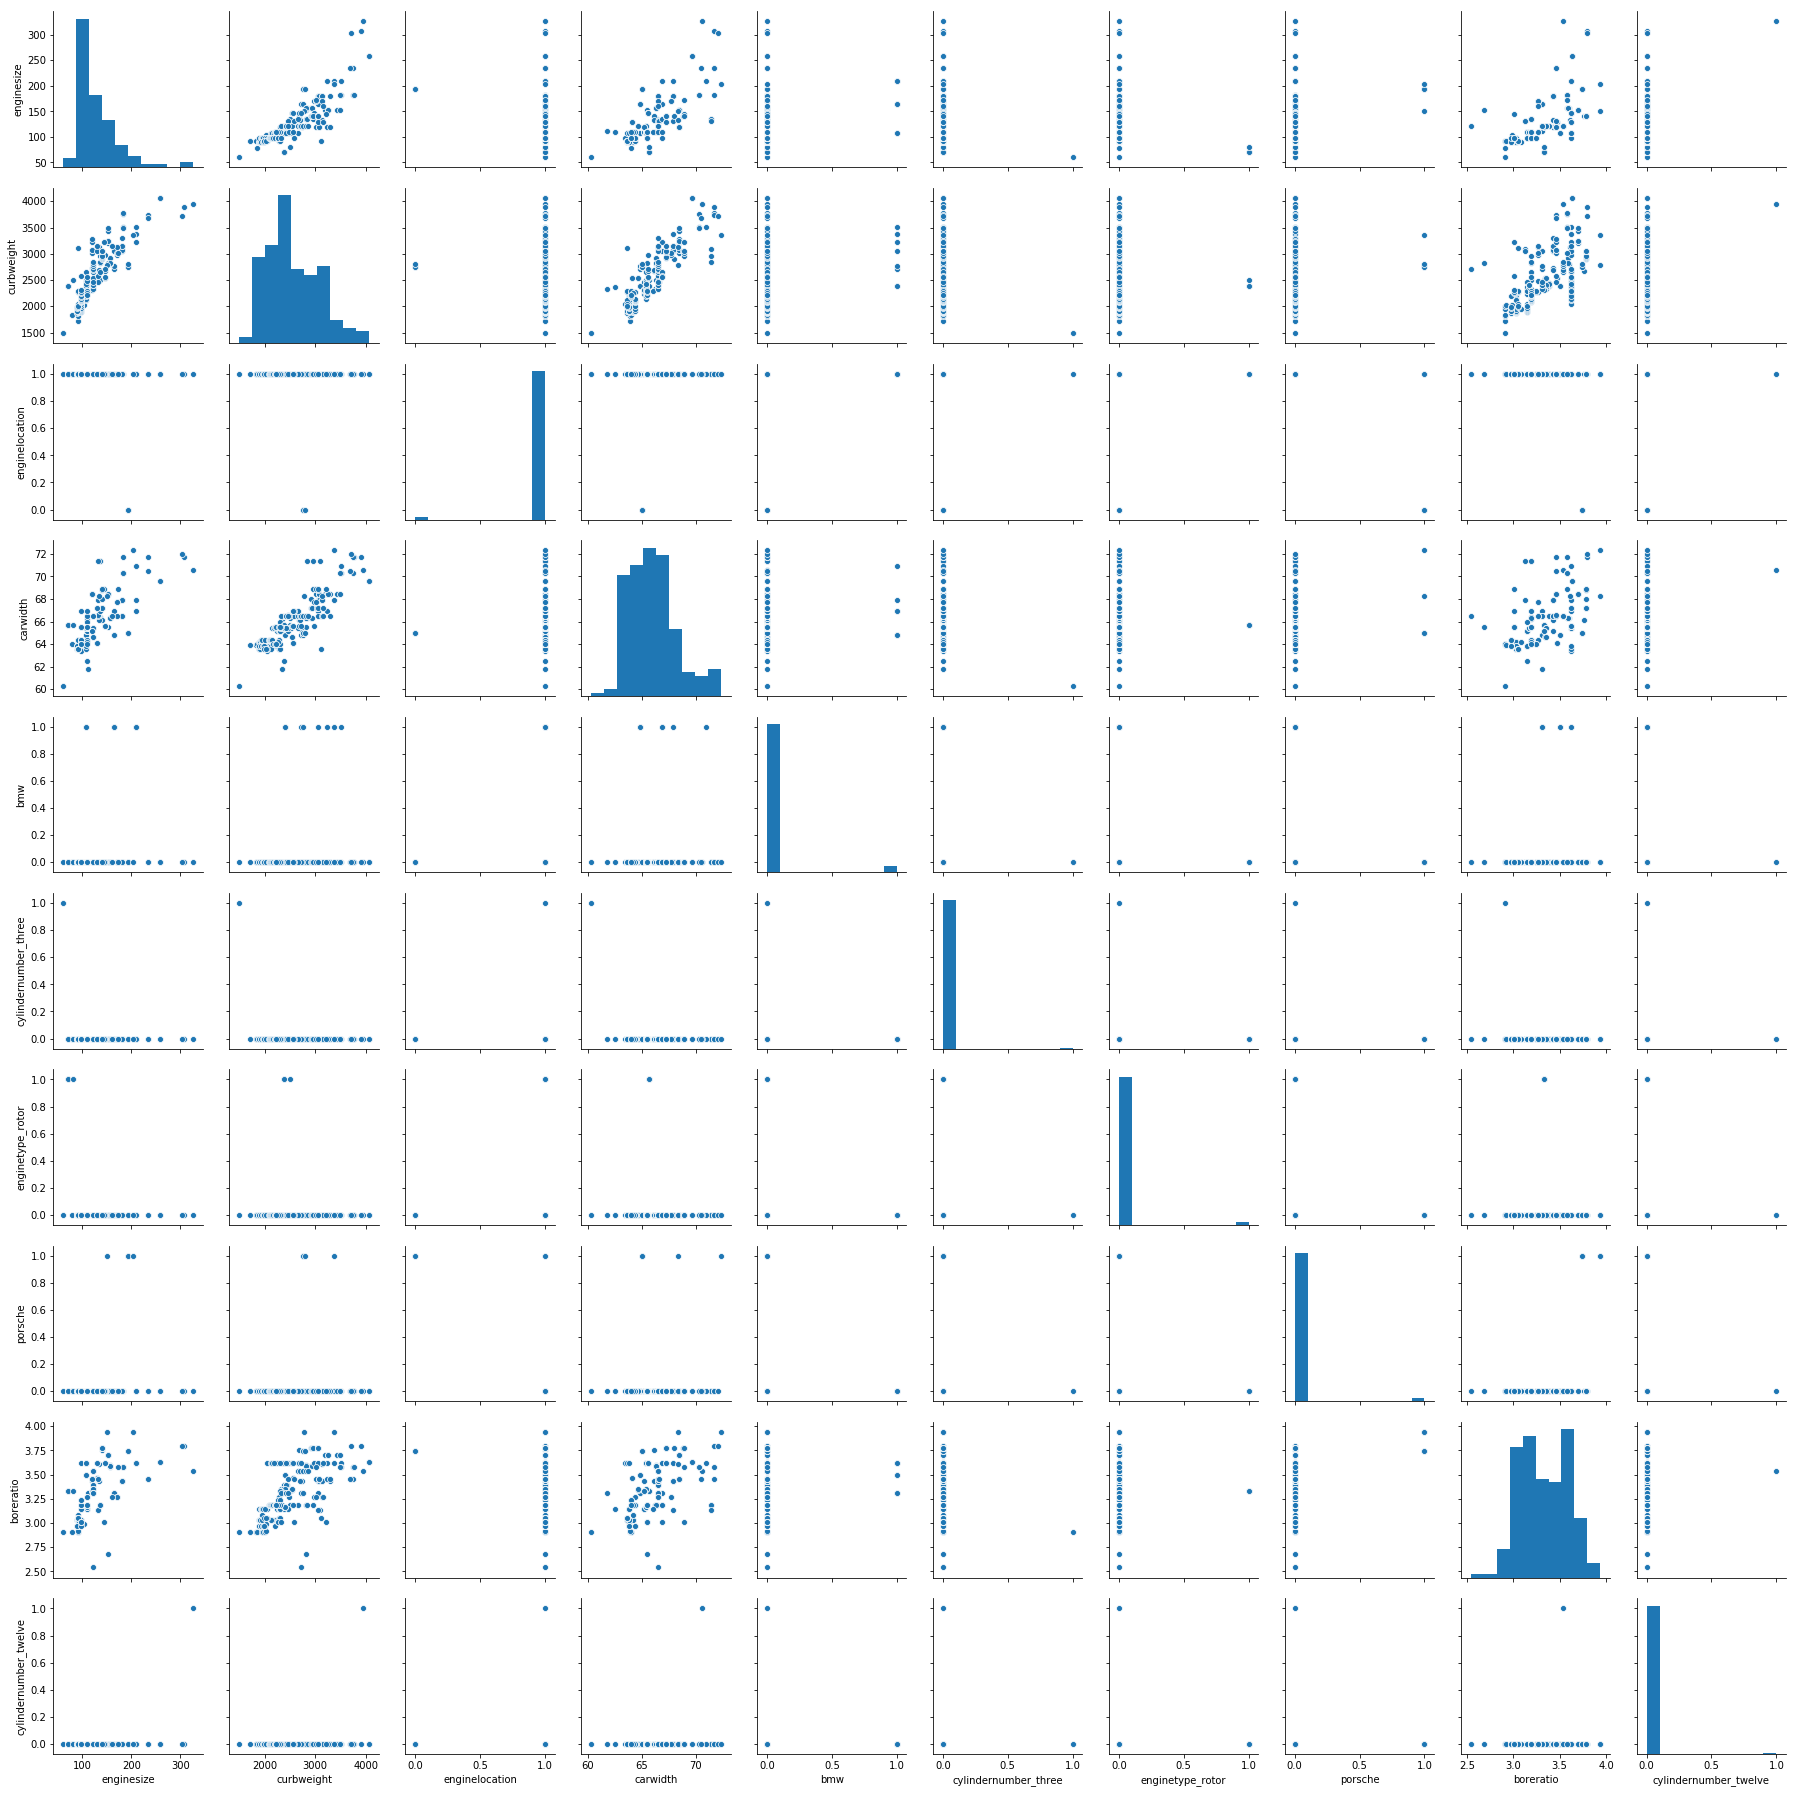

In [41]:
## pai-wise plot & Heatmap to understand correlation between the top 10 variables
sns.pairplot(cars[top10[0]])
plt.show()

#### Observation : 

1. Engine size is correlated with carwidth , curbweight and boreratio. These 3 variables are highly correlated.
2. EngineSize, Curbweight, enginelocation, carwidth, bmw are identified as  top 5 features
3. Build modelusing these variables 



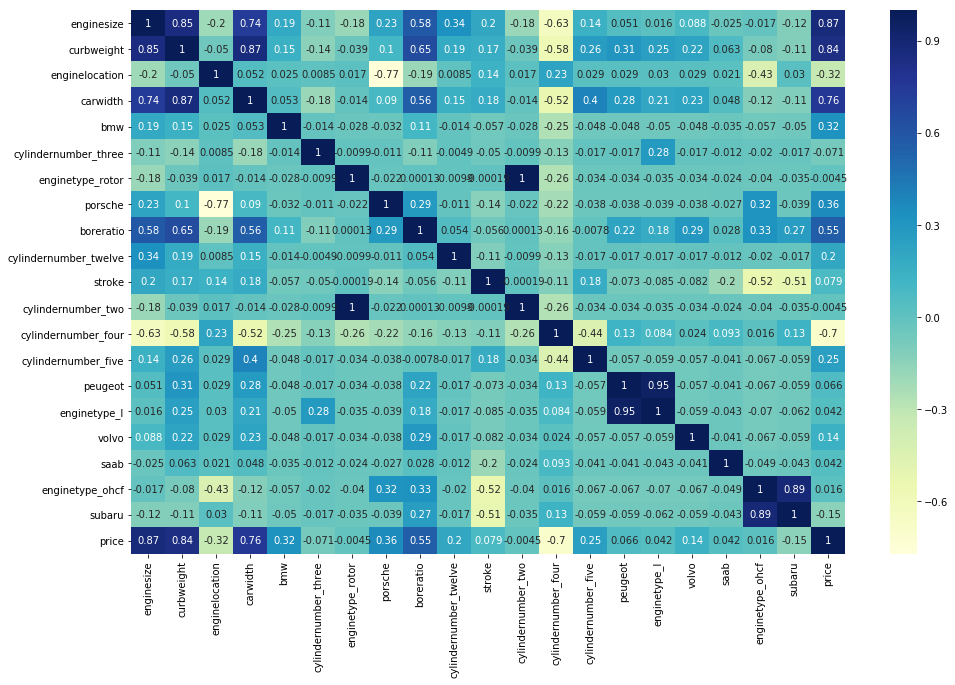

In [42]:
###Produce heatmap for top 20 independent variables selected by RFE - for referene during manual model building.
corr_m=pd.concat([cars[top20[0]],cars['price']], axis=1)
plt.figure(figsize = (16, 10))
sns.heatmap(corr_m.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation:
1. Price is heavily correlated to Enginesize , curbweight, carwdith, boreration, bmw, porsche .
2. Price is negatively correlated to Enginelocation,Enginetype.

### Building a linear model

#### Model 1  

In [43]:
# Creating X train dataframe with RFE selected first variable. 
X_train_rfe = X_train[['enginesize']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())


### Model 1 gives 0.753 & 0.72 R-squared & Adjusted R-squared respectively.
### p value is significant for the variable. 


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.09e-44
Time:                        18:23:01   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

#### Model 2  

In [44]:
# Creating X train dataframe with RFE selected two variable. 
X_train_rfe = X_train[['enginesize','curbweight']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 2 gives 0.802 & 0.799 R-squared & Adjusted R-squared respectively.
### Improved R-squared and adjiuested R-squared compared to the previous model.
### p value is significant for the variable. 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.31e-50
Time:                        18:23:01   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

### Model 3 

In [45]:
# Creating X train dataframe with RFE selected three variables. 
X_train_rfe = X_train[['enginesize','curbweight','enginelocation']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 3 gives 0.824 & 0.820 R-squared & Adjusted R-squared respectively.
### Improved R-squared and adjiuested R-squared compared to the previous model.
### p vlaue is significant for the variable. 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     216.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.58e-52
Time:                        18:23:02   Log-Likelihood:                 141.03
No. Observations:                 143   AIC:                            -274.1
Df Residuals:                     139   BIC:                            -262.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2572      0.095      2.

### Model 4 

In [46]:
# Creating X train dataframe with RFE selected four variables. 
X_train_rfe = X_train[['enginesize','curbweight','enginelocation','carwidth']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 4 gives 0.837 & 0.832 R-squared & Adjusted R-squared respectively.
### Improved R-squared and adjiuested R-squared compared to the previous model.
### p value is significant for the variable. 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     177.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.47e-53
Time:                        18:23:02   Log-Likelihood:                 146.69
No. Observations:                 143   AIC:                            -283.4
Df Residuals:                     138   BIC:                            -268.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2544      0.092      2.

### Model 5 

In [47]:
# Creating X_train dataframe with RFE selected five variables. 
X_train_rfe = X_train[['enginesize','curbweight','enginelocation','carwidth','bmw']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 5 gives 0.886 & 0.882 R-squared & Adjusted R-squared respectively.
### Improved R-squared and adjiuested R-squared compared to the previous model.
### p vlaue is significant for the variable.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     214.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.87e-63
Time:                        18:23:02   Log-Likelihood:                 172.52
No. Observations:                 143   AIC:                            -333.0
Df Residuals:                     137   BIC:                            -315.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2960      0.077      3.

### Model 6 - Adding next top 5 variable - one by one  

In [48]:
# Creating X train dataframe with RFE selected six variables. 
X_train_rfe = X_train[['enginesize','curbweight','enginelocation','carwidth','bmw','cylindernumber_three']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 6 gives 0.892 & 0.887 R-squared & Adjusted R-squared respectively.
### Improved R-squared and adjiuested R-squared compared to the previous model.
### p vlaue is significant for the variable.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     186.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.11e-63
Time:                        18:23:02   Log-Likelihood:                 175.94
No. Observations:                 143   AIC:                            -337.9
Df Residuals:                     136   BIC:                            -317.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2907 

### Model 7 

In [49]:
# Creating X train dataframe with RFE selected seven variable. 
X_train_rfe = X_train[['enginesize','curbweight','enginelocation','carwidth','bmw','cylindernumber_three','enginetype_rotor']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 7 gives 0.902 & 0.897 R-squared & Adjusted R-squared respectively.
### Improved R-squared and adjiuested R-squared compared to the previous model.
### p vlaue is significant for the variable.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     178.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.64e-65
Time:                        18:23:02   Log-Likelihood:                 183.34
No. Observations:                 143   AIC:                            -350.7
Df Residuals:                     135   BIC:                            -327.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2648 

### Model 8 

In [50]:
# Creating X_train dataframe with RFE selected eight variables. 
X_train_rfe = X_train[['enginesize','curbweight','enginelocation','carwidth','bmw','cylindernumber_three','enginetype_rotor','porsche']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 8 gives 0.906 & 0.901 R-squared & Adjusted R-squared respectively.
### Improved adjiuested R-squared compared to the previous model but only slight improvement in R-squared. 
### p vlaue is still appearing to be significant for all variables.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     161.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.97e-65
Time:                        18:23:03   Log-Likelihood:                 186.09
No. Observations:                 143   AIC:                            -354.2
Df Residuals:                     134   BIC:                            -327.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1557 

### Model 9 

In [51]:
# Creating X_train dataframe with RFE selected nine variables. 
X_train_rfe = X_train[['enginesize','curbweight','enginelocation','carwidth','bmw','cylindernumber_three','enginetype_rotor','porsche','boreratio']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 9 gives 0.912 & 0.906 R-squared & Adjusted R-squared respectively.
### slight improvement in R-squared & Adj. R-squared compared to previous model. 
### p vlaue is still appearing to be significant for all variables.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.18e-65
Time:                        18:23:03   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1760 

### Model 10

In [52]:
# Creating X_train dataframe with RFE selected ten variables. 
X_train_rfe = X_train[['enginesize','curbweight','enginelocation','carwidth','bmw','cylindernumber_three','enginetype_rotor','porsche','boreratio','cylindernumber_twelve']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 10 gives 0.912 & 0.906 R-squared & Adjusted R-squared respectively.
### No variation in R-squared & Adj.R-squared values compared to prev model. 
### p vlaue is still appearing to be significant for most variables except cyclindernumber_twelve.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.21e-64
Time:                        18:23:03   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

### Check VIF for these 10 variables 

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,44.03
3,carwidth,34.95
0,enginesize,24.23
8,boreratio,12.56
2,enginelocation,11.11
9,cylindernumber_twelve,1.49
7,porsche,1.40
6,enginetype_rotor,1.26
4,bmw,1.18
5,cylindernumber_three,1.06


### Model 11 -Drop variable with high VIF  

In [54]:
# Creating X train dataframe - dropping curbweight - highest VIF 
X_train_rfe = X_train[['enginesize','enginelocation','carwidth','bmw','cylindernumber_three','enginetype_rotor','porsche','boreratio','cylindernumber_twelve']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 11 gives 0.903 & 0.896 R-squared & Adjusted R-squared respectively.
### Reduced R-squared & Adj.R-squared values compared to prev model. 
### p vlaue is still appearing to be significant for most variables except cyclindernumber_twelve & Porsche.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     137.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.17e-63
Time:                        18:23:03   Log-Likelihood:                 183.70
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     133   BIC:                            -317.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [55]:
### re-check VIF for the remaining variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##Carwidth , boreration, enginesize have higher VIF . 
### boreratio has higher VIF and less significant. Build model dropping this variable.


,Features,VIF
2,carwidth,22.94
0,enginesize,13.71
7,boreratio,11.71
1,enginelocation,10.35
8,cylindernumber_twelve,1.39
6,porsche,1.24
5,enginetype_rotor,1.20
3,bmw,1.18
4,cylindernumber_three,1.06


### Model 12 

In [56]:
## Dropping boreratio - insignificant p-value and high VIF 
 
X_train_rfe = X_train[['enginesize','enginelocation','carwidth','bmw','cylindernumber_three','enginetype_rotor','porsche','cylindernumber_twelve']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 12 gives 0.900 & 0.894 R-squared & Adjusted R-squared respectively.
### Reduced R-squared & Adj.R-squared values compared to prev model. 
### p vlaue is still appearing to be significant for most variables except cyclindernumber_twelve & Porsche.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     150.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.88e-63
Time:                        18:23:03   Log-Likelihood:                 181.62
No. Observations:                 143   AIC:                            -345.2
Df Residuals:                     134   BIC:                            -318.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [57]:
### re-check VIF for the remaining variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##Carwidth , enginesize have higher VIF . 


,Features,VIF
2,carwidth,21.89
0,enginesize,12.93
1,enginelocation,8.38
7,cylindernumber_twelve,1.36
3,bmw,1.18
5,enginetype_rotor,1.18
6,porsche,1.14
4,cylindernumber_three,1.06


### Model 13 - Drop enginesize due to high VIF  

In [58]:
## Dropping enginesize
X_train_rfe = X_train[['enginelocation','carwidth','bmw','cylindernumber_three','enginetype_rotor','porsche','cylindernumber_twelve']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 13 gives 0.823 & 0.813 R-squared & Adjusted R-squared respectively.
### significantly R-squared & Adj.R-squared values compared to prev model. 


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     89.44
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.48e-47
Time:                        18:23:03   Log-Likelihood:                 140.61
No. Observations:                 143   AIC:                            -265.2
Df Residuals:                     135   BIC:                            -241.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

### Model 14 - Bring back enginesize and drop carwidth 

In [59]:
## Dropping carwidth
X_train_rfe = X_train[['enginesize','enginelocation','bmw','cylindernumber_three','enginetype_rotor','porsche','cylindernumber_twelve']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 14 gives 0.853 & 0.845 R-squared & Adjusted R-squared respectively.
### Reduced R-squared & Adj.R-squared values compared to model 12.
### p vlaue is still appearing to be significant for most variables except cyclindernumber_twelve & enginelocation_rear       .

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.92e-53
Time:                        18:23:04   Log-Likelihood:                 154.07
No. Observations:                 143   AIC:                            -292.1
Df Residuals:                     135   BIC:                            -268.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [60]:
### re-check VIF for the remaining variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### EngineSize has higher VIF .

,Features,VIF
0,enginesize,5.03
1,enginelocation,4.30
6,cylindernumber_twelve,1.26
2,bmw,1.13
5,porsche,1.13
4,enginetype_rotor,1.09
3,cylindernumber_three,1.03


### Model 15  

In [61]:
## Dropping enginelocation as the significance is less.

X_train_rfe = X_train[['enginesize','cylindernumber_three','bmw','enginetype_rotor','porsche','cylindernumber_twelve']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 15 gives 0.852 & 0.845 R-squared & Adjusted R-squared respectively.
### Reduced R-squared & Adj.R-squared values compared to model 12.
### p vlaue is still appearing to be significant for most variables except cyclindernumber_twelve & enginelocation_rear       .

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     130.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.14e-54
Time:                        18:23:04   Log-Likelihood:                 153.34
No. Observations:                 143   AIC:                            -292.7
Df Residuals:                     136   BIC:                            -271.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

### Model 16 

In [62]:
## Dropping cylindernumber_three      
X_train_rfe = X_train[['enginesize','bmw','enginetype_rotor','porsche','cylindernumber_twelve']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe_m16=X_train_rfe
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Model 16 gives 0.850 & 0.845 R-squared & Adjusted R-squared respectively.
### Reduced R-squared & Adj.R-squared values compared to model 12.
### p values showing varaibles as significant.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.24e-54
Time:                        18:23:04   Log-Likelihood:                 152.61
No. Observations:                 143   AIC:                            -293.2
Df Residuals:                     137   BIC:                            -275.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [63]:
### re-check VIF for the remaining variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,enginesize,1.29
1,bmw,1.11
4,cylindernumber_twelve,1.11
3,porsche,1.07
2,enginetype_rotor,1.00


In [64]:
rfe_result.sort_values(by=2).head(20)
## checking for the next top 5 values identified by RFE.

,0,1,2
10,enginesize,True,1
9,curbweight,False,2
4,enginelocation,False,3
7,carwidth,False,4
20,bmw,False,5
59,cylindernumber_three,False,6
67,enginetype_rotor,False,7
33,porsche,False,8
11,boreratio,False,9
60,cylindernumber_twelve,False,10


### Model 17 - Manual addition of variables based on Correlation 

In [65]:
### from Heatmap, it can be seen that cyclindernumber_four, cylindernumber_five, volvo, subaru have higher correlation. 

X_train_rfe = X_train[['enginesize','bmw','enginetype_rotor','porsche','cylindernumber_twelve','cylindernumber_five','cylindernumber_four','volvo','subaru']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     113.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.50e-58
Time:                        18:23:04   Log-Likelihood:                 171.20
No. Observations:                 143   AIC:                            -322.4
Df Residuals:                     133   BIC:                            -292.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

In [66]:
### re-check VIF for the remaining variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.63
6,cylindernumber_four,1.84
5,cylindernumber_five,1.23
4,cylindernumber_twelve,1.22
1,bmw,1.20
8,subaru,1.12
3,porsche,1.11
7,volvo,1.09
2,enginetype_rotor,1.00


### Model 18  

In [67]:
### from Heatmap, it can be seen that cylindernumber_twelve has less correlation . hence removing to check how the model behaves

X_train_rfe = X_train[['enginesize','bmw','enginetype_rotor','porsche','cylindernumber_five','cylindernumber_four','volvo','subaru']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### Re-squared and Aj.R-squared are very close but slightly less than model 17.
### p-values shows insignificance for Subaru & cyclindernumber_four.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.49e-57
Time:                        18:23:05   Log-Likelihood:                 167.82
No. Observations:                 143   AIC:                            -317.6
Df Residuals:                     134   BIC:                            -291.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0940    

### Model 19 Remove cyclindernumber_four

In [68]:
### Removing cylindernumber_four to check how the model behaves

X_train_rfe = X_train[['enginesize','bmw','enginetype_rotor','porsche','cylindernumber_five','volvo','subaru']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

### R-Squared /Adj R-squared remains same. 
### Subaru is insignificant .

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     139.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.31e-58
Time:                        18:23:05   Log-Likelihood:                 167.74
No. Observations:                 143   AIC:                            -319.5
Df Residuals:                     135   BIC:                            -295.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0806    

### Model 20  - Remove subaru  

In [69]:
### Removing subaru to check how the model behaves

X_train_rfe = X_train[['enginesize','bmw','enginetype_rotor','porsche','cylindernumber_five','volvo']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

X_train_m20=X_train_rfe

### R-squared is at 0.878 & Adj.R-squared is closer at 0.873
### All variables have significant p-value.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.11e-59
Time:                        18:23:05   Log-Likelihood:                 167.60
No. Observations:                 143   AIC:                            -321.2
Df Residuals:                     136   BIC:                            -300.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0823    

In [70]:
### re-check VIF for the remaining variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.39
1,bmw,1.12
4,cylindernumber_five,1.12
3,porsche,1.07
5,volvo,1.07
2,enginetype_rotor,1.00


### Model 21 - Adding Drivewheel - based on boxplot analysis ( done above) 

In [71]:
###Add drivewheel, toyota and Symboling_-1 based on manaual analysis .

X_train_rfe = X_train[['enginesize','Symboling_-1','drivewheel','bmw','enginetype_rotor','porsche','cylindernumber_five','volvo','toyota']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

X_train_m21=X_train_rfe

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.03e-59
Time:                        18:23:06   Log-Likelihood:                 175.84
No. Observations:                 143   AIC:                            -331.7
Df Residuals:                     133   BIC:                            -302.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0615    

In [72]:
lm.pvalues

const                  7.102649e-06
enginesize             3.074149e-34
Symboling_-1           1.857142e-02
drivewheel             5.220663e-03
bmw                    4.147165e-09
enginetype_rotor       7.715126e-05
porsche                1.712593e-06
cylindernumber_five    9.838856e-07
volvo                  2.697013e-01
toyota                 1.193642e-02
dtype: float64

In [73]:
### re-check VIF for the remaining variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,drivewheel,3.43
0,enginesize,2.86
1,Symboling_-1,1.69
7,volvo,1.47
4,enginetype_rotor,1.25
8,toyota,1.25
3,bmw,1.24
6,cylindernumber_five,1.23
5,porsche,1.13


### Model 22 - Remove volvo which has become insignificant 

In [74]:
### remove volvo
X_train_rfe = X_train[['enginesize','enginetype_rotor','Symboling_-1','drivewheel','bmw','porsche','cylindernumber_five','toyota']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

X_train_m22=X_train_rfe

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     136.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.57e-60
Time:                        18:23:08   Log-Likelihood:                 175.18
No. Observations:                 143   AIC:                            -332.4
Df Residuals:                     134   BIC:                            -305.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0586    

In [75]:
### re-check VIF for the remaining variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,drivewheel,3.19
0,enginesize,2.85
2,Symboling_-1,1.41
1,enginetype_rotor,1.23
4,bmw,1.22
6,cylindernumber_five,1.20
7,toyota,1.18
5,porsche,1.12


In [76]:
lm.pvalues

const                  1.228727e-05
enginesize             1.511243e-34
enginetype_rotor       1.311269e-04
Symboling_-1           2.013407e-03
drivewheel             1.076733e-03
bmw                    6.543345e-09
porsche                2.382346e-06
cylindernumber_five    1.656234e-06
toyota                 3.464565e-03
dtype: float64

### Model 23 - Add 'buick' from manual analysis  

In [77]:
## Adding buick
X_train_rfe = X_train[['enginesize','buick','enginetype_rotor','Symboling_-1','drivewheel','bmw','porsche','cylindernumber_five','toyota']]

# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

X_train_m23=X_train_rfe

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.81e-60
Time:                        18:23:11   Log-Likelihood:                 177.72
No. Observations:                 143   AIC:                            -335.4
Df Residuals:                     133   BIC:                            -305.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0534    

In [78]:
### re-check VIF for the remaining variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,drivewheel,3.24
0,enginesize,2.86
1,buick,1.67
3,Symboling_-1,1.64
7,cylindernumber_five,1.34
8,toyota,1.24
2,enginetype_rotor,1.23
5,bmw,1.23
6,porsche,1.12


### Observation :

1. Model 23 provides better Adj.residual stats - 0.887.
2. No mutlicolinearity seen.
3. Freeze on model 23. 

### Residual Analysis on  Trained data

In [79]:
y_train_price = lm.predict(X_train_m23)

Text(0.5,0,'Errors')

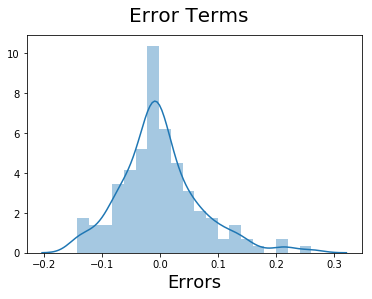

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## error distribution is closer to normal distribution with values closer to zero. 

Text(0.5,0,'Index')

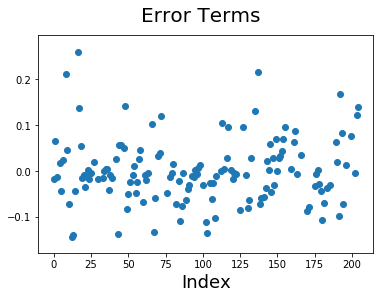

In [81]:
# Plot the error terms to inspect if there is a pattern 
fig = plt.figure()
plt.scatter(y_train.index,(y_train - y_train_price))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 18)                         # X-label

### no pattern seen - hence multicolinearlity can be ruled out .

### Making Predictions 

In [82]:
##Scaling the test data
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [83]:
df_test.duplicated().unique()

array([False])

In [84]:
y_test = df_test.pop('price')
X_test = df_test

In [85]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train_m23=X_train_m23.drop('const',1)
X_test_new = X_test[X_train_m23.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [86]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'Predicted Price')

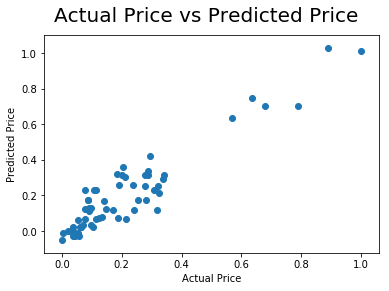

In [87]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Actual Price vs Predicted Price', fontsize=20)              
plt.xlabel('Actual Price')                          
plt.ylabel('Predicted Price')  

## Linear pattern observed. Predictions are closer to actual values.

Text(0.5,0,'Index')

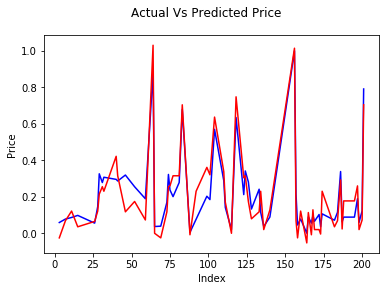

In [88]:
## Plotting Actual & predicted Price for the Test index.
fig = plt.figure()
plt.plot(y_test.index.sort_values(),y_test,'b-')     ## Actual Plot line
plt.plot(y_pred.index.sort_values(),y_pred, 'r-')  ### Predicted Plot line 
fig.suptitle('Actual Vs Predicted Price')              
                      
plt.ylabel('Price')  
plt.xlabel('Index')


### Residual analysis on Test data 

Text(0.5,0,'Errors')

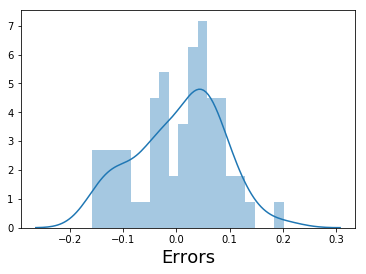

In [89]:
sns.distplot((y_test - y_pred), bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

### Most of the error terms are closer to zero. however, there are few spikes seen towards the tail.

Text(0.5,0,'Index')

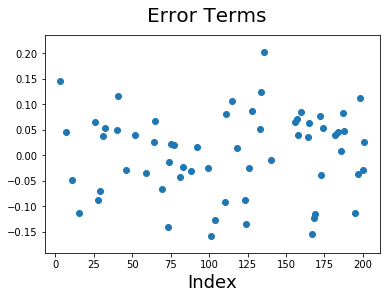

In [90]:
# Plot the error terms to inspect if there is a pattern 
fig = plt.figure()
plt.scatter(y_test.index,(y_test - y_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 18)                         # X-label


In [91]:
## r2 score for the model

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8518635047965386

### Summary :

Y ( Price)  = -0.0534 +(0.9300 * enginesize)+ (0.0933 * if company is Buick ) + (  0.0607 * drivewheel ) + (0.2125 * if Car is bmw ) + (0.1707 * enginetype_rotor) +(0.2297 * if Car is Porsche)+(0.1137 * Cyclinder number Five ) + ( -0.0495 * if car is Toyota ) + ( 0.0557 * Symboling_-1)

* Key attributes impacting Price of Car

 1. Engine Size  
 2. Car maker is Buick
 3. Drivewheel - Rwd or Fwd
 4. Car maker is  BMW   
 5. EngineType - if rotor ( This is seen only in 2-cyclinder engine) 
 6. Car maker is Porsche
 7. Car maker is Toyota
 8. Five cylinder engine
 9. Symboling being -1.
 
 